# 线性回归(LR)
## 处理物理实验数据求重力加速度

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = 'Ex1Data1.txt'
data = pd.read_csv(path, header=None, names=['Time(s)', 'Speed(m/s)'])
data.head(100)

,Time(s),Speed(m/s)
0,0.100,0.981
1,0.200,1.962
2,0.300,2.943
3,0.400,3.924
4,0.500,4.905
...,...,...
95,0.598,5.646
96,0.698,6.587
97,0.798,7.528
98,0.898,8.469


In [4]:
print(data.describe())

          Time(s)  Speed(m/s)
count  320.000000  320.000000
mean     0.555000    5.515594
std      0.287813    2.926311
min      0.090000    0.866000
25%      0.305000    3.017250
50%      0.555000    5.475000
75%      0.805000    7.956750
max      1.020000   11.460000


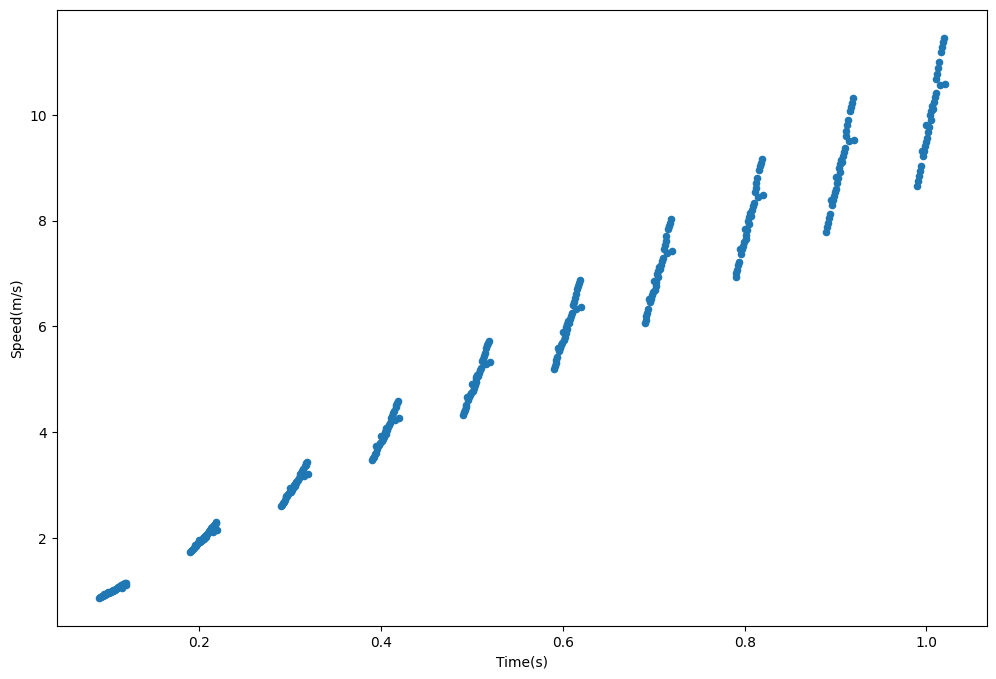

In [5]:
data.plot(kind='scatter', x='Time(s)', y='Speed(m/s)', figsize=(12,8))
plt.show()

首先，我们将创建一个以参数θ为特征函数的代价函数（cost function）
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：

假设函数（Hypothesis）
$$ h_{\theta}(x) = \theta^T X = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n $$

代价函数矩阵形式
$$ J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y) $$


In [6]:
def CostFunction(X, y, theta):
    m = len(y)
    predictions = X.dot(theta.T)
    # .dot() 在 numpy 中既可以用于向量点乘，也可以用于矩阵乘法，具体取决于参与运算的对象形状。
    # 这里的 X 是 m*n 矩阵，theta.T 是 n*1 矩阵，所以结果是 m*1 矩阵
    # predictions 是一个 m*1 矩阵，表示每个样本的预测值
    # y 是一个 m*1 矩阵，表示每个样本的实际值
    # predictions - y 结果是一个 m*1 矩阵，表示每个样本的预测误差
    sq_errors = np.power(predictions - y, 2)# 用np.power逐元素平方, 返回一个新的数组
# np.power() 的参数可以是 numpy 数组、numpy 矩阵、Python 列表 或 标量。
# np.power(array_like, exponent) 
    return 1 / (2 * m) * np.sum(sq_errors)


In [7]:
data.insert(0, 'Ones', 1)

这行代码的作用是在原始数据的最左侧（第0列）插入一列名为 'Ones' 的新列，所有值都是 1。

你的原始数据（ex1data1.txt）是两列，分别是 Population 和 Profit，如下：
| Time(s)    | Speed(m/s) |
|------------|---------|
| 6.1101     | 17.592  |
| 5.5277     | 9.1302  |
| ...        | ...     |

执行 data.insert(0, 'Ones', 1) 后，数据变成三列：
| Ones | Time(s) | Speed(m/s)  |
|------|------------|---------|
| 1    | 6.1101     | 17.592  |
| 1    | 5.5277     | 9.1302  |
| ...  | ...        | ...     |

效果说明：
'Ones' 这一列全是 1，作为“截距项”。
这样做后，每一行的数据变成 [1, Population, Profit]。

h(x) = θ0 * 1 + θ1 * x1 + θ2 * x2 + ... + θn * xn
其中 θ0 是常数项（偏置项）。
如果不加这一列，矩阵乘法只能表示没有常数项的模型。
加上一列全1后，可以把 θ0 和其他参数统一写成矩阵形式，方便用向量化方法（如 X @ θ.T）进行计算和优化。

初始化变量

In [8]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列

观察前10行

In [9]:
X.head(10)#head()是观察前10行

,Ones,Time(s)
0,1,0.1
1,1,0.2
2,1,0.3
3,1,0.4
4,1,0.5
5,1,0.6
6,1,0.7
7,1,0.8
8,1,0.9
9,1,1.0


In [10]:
y.head()#head()默认观察前5行

,Speed(m/s)
0,0.981
1,1.962
2,2.943
3,3.924
4,4.905


转换为numpy矩阵


In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [12]:
theta

matrix([[0, 0]])

theta是一个 1*2 矩阵，分别代表x的系数以及常数项系数，一开始先设置为0

In [13]:
X.shape, theta.shape, y.shape
# print((X.shape, theta.shape, y.shape))

((320, 2), (1, 2), (320, 1))

计算代价函数

In [14]:
CostFunction(X, y, theta)

np.float64(19.479154828125)

# Batch Gradient Decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

其中 $\alpha$ 是学习率（Learning rate）

梯度下降的CostFunction偏导数
$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)} $$

其中：
假设函数（Hypothesis）
$$ h_{\theta}(x) = \theta^T X = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n $$


In [15]:
def GradientDescent(X:np.matrix, y:np.matrix, theta:np.matrix, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y # '*'不是矩阵运算!!!
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = CostFunction(X, y, theta)
        
    return theta, cost

Faster Version


In [16]:
def GradientDescent_faster(X:np.matrix, y:np.matrix, theta:np.matrix, alpha, iters):
    cost = np.zeros(iters)
    m = len(X)  #   输出二维数组的行数
    # m = X.shape[0]  # 也可以用这种方式获取行
    
    print(X.shape, y.shape, theta.shape)
    
    for i in range(iters):
        error = (X * theta.T) - y
        # 向量化更新所有参数
        theta = theta - (alpha/m) * (error.T * X)
        cost[i] = CostFunction(X, y, theta)
        
    return theta, cost

在 NumPy 中，`*`（逐元素乘法）和 `@` 或 `np.dot()`（矩阵乘法/点乘）有本质区别。下面我用具体示例演示它们的差别。

---

### **示例 1：一维数组（向量）**
```python
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# 逐元素乘法（*）
elementwise = a * b  # [1*4, 2*5, 3*6] = [4, 10, 18]

# 点乘（@ 或 np.dot）
dot_product = a @ b  # 1*4 + 2*5 + 3*6 = 4 + 10 + 18 = 32

print("逐元素乘法:", elementwise)  # 输出: [4, 10, 18]
print("点乘结果:", dot_product)    # 输出: 32
```

**关键区别**：
- `*`：对应位置相乘，结果仍是同形状数组。
- `@`：求和后返回标量（向量的内积）。

---

### **示例 2：二维数组（矩阵）**
```python
A = np.array([[1, 2], [3, 4]])  # 2x2
B = np.array([[5, 6], [7, 8]])  # 2x2

# 逐元素乘法（*）
elementwise = A * B  # [[1*5, 2*6], [3*7, 4*8]] = [[5, 12], [21, 32]]

# 矩阵乘法（@）
matrix_mult = A @ B  # 标准矩阵乘法
# 计算过程：
# 第一行: [1*5 + 2*7, 1*6 + 2*8] = [19, 22]
# 第二行: [3*5 + 4*7, 3*6 + 4*8] = [43, 50]
# 结果: [[19, 22], [43, 50]]

print("逐元素乘法:\n", elementwise)
# 输出:
# [[ 5, 12],
#  [21, 32]]

print("矩阵乘法:\n", matrix_mult)
# 输出:
# [[19, 22],
#  [43, 50]]
```

**关键区别**：
- `*`：要求两个矩阵形状相同，对应位置相乘。
- `@`：要求 `A.shape[1] == B.shape[0]`，输出形状为 `(A.shape[0], B.shape[1])`。

---

### **示例 3：广播情况下的逐元素乘法**
```python
A = np.array([[1, 2], [3, 4]])  # 2x2
v = np.array([10, 20])           # (2,)

# 逐元素乘法（广播）
elementwise = A * v  # v被广播为 [[10,20], [10,20]]
# 结果: [[1*10, 2*20], [3*10, 4*20]] = [[10, 40], [30, 80]]

# 矩阵乘法（@）
# 需要将v转为列向量 (2,1)
v_col = v.reshape(-1, 1)  # shape (2,1)
matrix_mult = A @ v_col    # 结果形状 (2,1)
# 计算过程:
# [1*10 + 2*20] = [50]
# [3*10 + 4*20] = [110]
# 结果: [[50], [110]]

print("广播逐元素乘法:\n", elementwise)
# 输出:
# [[10, 40],
#  [30, 80]]

print("矩阵乘法:\n", matrix_mult)
# 输出:
# [[ 50],
#  [110]]
```

**关键区别**：
- `*` 广播规则：较小数组会被扩展以匹配较大数组的形状。
- `@` 严格遵循矩阵乘法规则。


**错误示范**：
```python
A = np.array([[1, 2]])  # (1,2)
B = np.array([[3], [4]]) # (2,1)

# 错误：逐元素乘法形状不匹配
try:
    print(A * B)
except ValueError as e:
    print("Error:", e)  # 报错：形状无法广播

# 正确：矩阵乘法
print(A @ B)  # 输出: [[11]] (1*3 + 2*4)
```

理解这两者的区别对正确实现机器学习算法（如梯度下降）至关重要！

逐元素乘法（Element-wise Multiplication）
---

### **1. 数学本质：Hadamard 积**
逐元素乘法在数学上称为 **Hadamard 积**（Hadamard Product），定义如下：
- 对两个同维度的矩阵  A  和  B ，其 Hadamard 积 $A \circ B$ 满足：
  $$(A \circ B)_{ij} = A_{ij} \times B_{ij}$$
- **数学意义**：它是张量积的一种特例，在泛函分析、矩阵论中均有应用。

---

### **2. 实际应用场景**
#### **(1) 特征缩放（Feature Scaling）**
在数据预处理中，需要对特征矩阵 \( X \) 的每一列（特征）乘以不同的权重（如归一化系数）：
```python
X = np.array([[1, 2], [3, 4]])  # 特征矩阵
scaling_factors = np.array([0.1, 0.5])  # 每列的缩放系数
X_scaled = X * scaling_factors  # 逐列缩放
```
**结果**：
$$
\begin{bmatrix}
1 \times 0.1 & 2 \times 0.5 \\
3 \times 0.1 & 4 \times 0.5 \\
\end{bmatrix}
=
\begin{bmatrix}
0.1 & 1 \\
0.3 & 2 \\
\end{bmatrix}
$$

---

#### **(2) 激活函数计算**
神经网络中的激活函数（如 Sigmoid、ReLU）需要逐元素操作：
```python
def relu(x):
    return np.maximum(0, x)  # 逐元素取最大值

z = np.array([[-1, 2], [0.5, -3]])
relu(z)  # 输出: [[0, 2], [0.5, 0]]
```

---

#### **(3) 注意力机制（Attention Mechanism）**
在 Transformer 模型中，注意力权重矩阵与值矩阵的加权求和通过逐元素乘法实现：
\[
\text{Output} = \text{Attention Weights} \circ \text{Values}
\]

---

#### **(4) 物理建模与科学计算**
- **微分方程数值解**：在有限元分析中，逐元素乘法用于计算局部刚度矩阵与载荷向量的乘积。
- **信号处理**：滤波器系数与信号采样点的逐点相乘（如 FIR 滤波）。

---

### **3. 为什么不用矩阵乘法替代？**
假设有一个需求：将图像 \( I \) 的每个像素值乘以一个掩码 \( M \)（如去噪）。  
- **矩阵乘法**：无法直接实现，因为矩阵乘法会混合行列信息。
- **逐元素乘法**：直接对应像素操作，保留空间局部性。

```python
I = np.random.rand(100, 100)  # 图像像素
M = np.random.rand(100, 100)  # 随机掩码
filtered_image = I * M  # 逐像素过滤
```

---

### **4. 数学严谨性**
逐元素乘法是 **张量代数** 的一部分，严格定义在以下场景：
- **交换环（Commutative Ring）**：满足乘法交换律的代数结构。
- **函数空间**：两个函数 \( f(x) \) 和 \( g(x) \) 的逐点乘积 \( (f \cdot g)(x) = f(x)g(x) \)。

其中iter(iteration)是迭代次数

In [17]:
def GradientDescent_auto(X:np.matrix, y:np.matrix, theta:np.matrix, alpha, max_iters=10000, tol=1e-6):
    theta = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[1])# 确保theta是np.matrix类型
    cost = []
    prev_cost = float('inf') # 初始化第0个代价为无穷大
    m = len(X)


    for i in range(max_iters):
        error = (X * theta.T) - y
        # 向量化更新所有参数
        theta = theta - (alpha/m) * (error.T * X)
    
        curr_cost = CostFunction(X, y, theta)
        cost.append(curr_cost)
        # 判断是否收敛
        if abs(prev_cost - curr_cost) < tol:
            break
        prev_cost = curr_cost
    return theta, cost

tol 是收敛阈值，max_iters 是最大迭代次数（防止死循环）。

设置变量

In [18]:
alpha = 0.01
iters = 100000

In [19]:
theta_output1, cost1 = GradientDescent(X, y, theta, alpha, iters)
print(theta_output1)
print(cost1)


[[-0.06866476 10.06172705]]
[19.0264667  18.58565264 18.15639936 ...  0.08826264  0.08826264
  0.08826264]


In [20]:

theta_output2, cost2 = GradientDescent_faster(X, y, theta, alpha, iters)
print(theta_output2)

(320, 2) (320, 1) (1, 2)
[[-0.06866476 10.06172705]]


In [21]:
theta_output3, cost3 = GradientDescent_auto(X, y, theta, alpha, iters,1e-23)
print(theta_output3)
# for i in range(len(cost3)):
#     print(cost3[i])  # 打印
cost3[-1]  # 打印最后一个代价

[[-0.06866419 10.06172608]]


np.float64(0.08826264476571828)

学习率设置过低会导致无法收敛甚至"往数值变大的方向"从而导致数据溢出，可以采用数据标准化

[[nan nan]]
[[nan nan]]
d:\Python\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Lam Tim\AppData\Local\Temp\ipykernel_4504\3076134047.py:9: RuntimeWarning: overflow encountered in power
  sq_errors = np.power(predictions - y, 2)# 用np.power逐元素平方, 返回一个新的数组
C:\Users\Lam Tim\AppData\Local\Temp\ipykernel_4504\3076134047.py:3: RuntimeWarning: invalid value encountered in dot
  predictions = X.dot(theta.T)
d:\Python\Lib\site-packages\numpy\matrixlib\defmatrix.py:226: RuntimeWarning: invalid value encountered in dot
  return N.dot(self, asmatrix(other))
C:\Users\Lam Tim\AppData\Local\Temp\ipykernel_4504\2212021935.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(prev_cost - curr_cost) < tol:

从输出结果和警告信息来看，梯度下降过程中出现了数值溢出的问题（`overflow` 和 `invalid value`），导致最终的 theta 输出为 `[[nan nan]]`。这通常是由于学习率（`alpha`）设置过大，导致参数更新时数值不稳定。

### 问题分析
1. **数值溢出**：在计算代价函数和梯度时，数值变得过大，导致 `overflow`。
2. **学习率过大**：当前的 `alpha = 0.01` 对于某些数据集可能过大，导致参数更新时步长过大，无法收敛。
3. **数据范围问题**：输入特征 `Speed(m/s)` 和标签 `Time(s)` 的数值范围差异较大（`Speed` 在 0-0.9，`Time` 在 0-496.8），这可能导致梯度下降不稳定。

### 解决方法
以下是改进的步骤：

#### 1. 数据标准化
将输入特征 `Speed(m/s)` 标准化（或归一化），使其数值范围接近标签 `Time(s)` 的范围。标准化公式为：
\[ X_{\text{norm}} = \frac{X - \mu}{\sigma} \]
其中 \(\mu\) 是均值，\(\sigma\) 是标准差。

#### 2. 调整学习率
尝试更小的学习率（如 `alpha = 0.001` 或更小），避免数值溢出。

#### 3. 调试输出
在每次迭代中输出代价函数的值，观察是否收敛。


### 如果问题仍然存在
如果改进后仍然出现数值问题，可以尝试以下进一步调试：
1. **检查输入数据**：确保数据中没有异常值（如 `inf` 或 `NaN`）。
2. **限制参数范围**：在梯度下降中对参数更新值进行限制（如裁剪梯度）。
3. **使用其他优化算法**：如随机梯度下降（SGD）或 Adam 优化器。


In [22]:
# 数据标准化
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma # 返回mu和sigma用于反标准化

In [23]:

# 提取特征和标签
X_norm = data.iloc[:, 1:2].values  # Speed(m/s)

# 标准化特征
X_norm, mu_X, sigma_X = feature_normalize(X_norm)

# 添加截距项
X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]


X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]
X_norm.shape[0]：获取标准化后的特征矩阵的行数（样本数量）。

np.ones(X_norm.shape[0])：生成一个长度为样本数量的全 1 列向量。
例如，若 X_norm 有 100 行，则生成 [1, 1, ..., 1]（形状为 (100, 1)）。

np.c_[...]：按列（column）拼接矩阵。
将全 1 列拼接到 X_norm 的左侧，形成新的矩阵。

(320, 2) (320, 1) (1, 2)
Final theta: [[5.47852283 2.87193497]]
k: [9.99410106]
b: [-0.06820326]


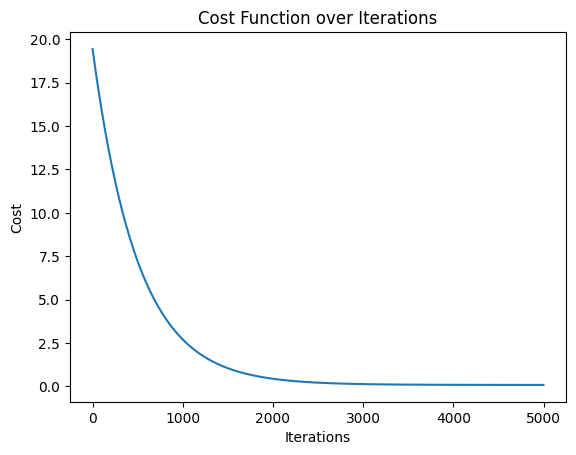

In [24]:

# 初始化参数
theta = np.zeros((1, 2))

# 设置学习率和迭代次数
alpha = 0.001  # 更小的学习率
iters = 5000

# 运行梯度下降
theta_output, cost = GradientDescent_faster(np.matrix(X_norm), np.matrix(y), np.matrix(theta), alpha, iters)
print("Final theta:", theta_output)

k=theta_output[0, 1] / sigma_X  # 反标准化计算k
print("k:", k)
b=theta_output[0, 0] - k * mu_X  # 反标准化计算b
print("b:", b)

# 绘制代价函数下降曲线
plt.plot(range(iters), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()


***可以发现标准化之后效率更高但是计算结果有些偏差***

# 特征归一化——数据标准化（Feature Normalization/Standardization）(Z-Score)
是机器学习中一种常见的数据预处理技术，其核心目的是将不同特征的数值范围统一到相似的尺度，从而提升模型的训练效率和稳定性。以下是标准化的原理、方法和作用的详细说明：

---

### 1. **标准化的数学原理**
标准化通常通过以下公式实现：
$$X_{\text{norm}} = \frac{X - \mu}{\sigma}$$
  **$$\mu$$** ：特征的均值（平均值）。
  **$$\sigma$$** ：特征的标准差（反映数据的离散程度）。
  **$$X$$** ：原始数据。
  **$$X_{\text{norm}}$$** ：标准化后的数据。

#### 示例：
假设原始数据 `Speed(m/s)` 的均值为 `0.45`，标准差为 `0.29`，则标准化后：
$$X_{\text{norm}} = \frac{0.5 - 0.45}{0.29} \approx 0.17$$

---

### 2. **为什么要标准化？**
#### （1）解决特征尺度差异
- **问题**：如果特征的数值范围差异大（如 `Speed(m/s)` 在 `[0, 1]`，`Time(s)` 在 `[0, 500]`），梯度下降时，参数更新会因不同特征的尺度差异而需要不同的学习率，导致收敛缓慢或不稳定。
- **标准化后**：所有特征被缩放到**均值为 0、标准差为 1 的分布**，梯度下降可以更高效地找到最优解。

#### （2）避免数值溢出
- 未标准化的数据在计算代价函数或梯度时，可能因数值过大导致溢出（如 `exp` 或 `power` 运算），出现 `NaN` 或 `inf`。

#### （3）加速收敛
- 标准化后的数据分布更对称（类似标准正态分布），梯度下降的路径更直接，迭代次数减少。

---

### 3. **标准化 vs. 归一化**
- **标准化（Standardization）**：
  - 公式：$$ X_{\text{norm}} = \frac{X - \mu}{\sigma} $$
  - 结果：数据均值为 0，标准差为 1。
  - 适用场景：适用于大多数算法（如线性回归、逻辑回归、神经网络等），尤其是数据存在异常值时更鲁棒。

- **归一化（Normalization）**：
  - 公式：$$ X_{\text{norm}} = \frac{X - \min(X)}{\max(X) - \min(X)}$$
  - 结果：数据被压缩到 `[0, 1]` 范围。
  - 适用场景：图像处理（像素值范围固定）、KNN、K-Means 等距离敏感的算法。

---

### 4. **标准化在梯度下降中的作用**
以线性回归为例：
- **未标准化时**：
  - 不同特征的梯度可能相差极大（如 `Speed` 的梯度为 `0.001`，`Time` 的梯度为 `100`）。
  - 需要为每个特征设置不同的学习率，否则可能导致震荡或无法收敛。

- **标准化后**：
  - 所有特征的梯度范围相近，可以用统一的学习率。
  - 参数更新方向更稳定，收敛更快。



现在我们来绘制线性模型以及数据，直观地看出它的拟合。

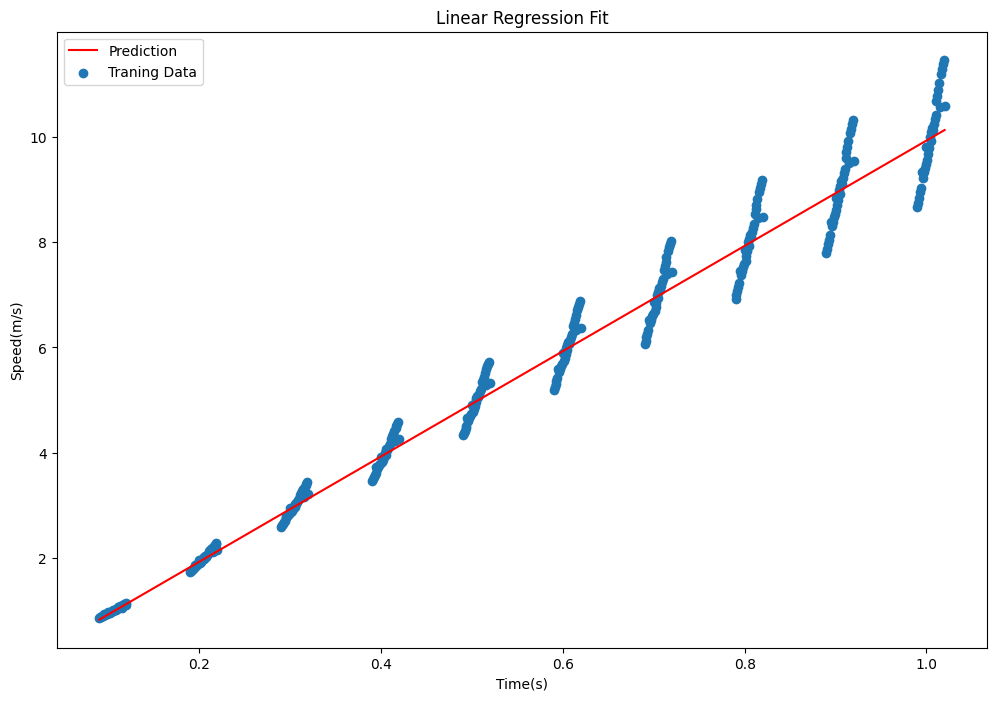

In [25]:
fig, ax = plt.subplots(figsize=(12,8)) # 创建一个图形和坐标轴对象

# 画拟合直线
x = np.linspace(data['Time(s)'].min(), data['Time(s)'].max(), 100)
f = b + (k * x)
ax.plot(x, f, 'r', label='Prediction') 

ax.scatter(data['Time(s)'], data['Speed(m/s)'], label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Speed(m/s)')
ax.set_title('Linear Regression Fit')

plt.show()

# 多变量线性回归
房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 

In [26]:
path = 'Ex1Data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head(data.shape[0])  # 显示所有行

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [27]:
theta = np.matrix(np.array([0, 0, 0]))  # 初始化theta为一维数组
data_copy = data2.copy()  # 复制data2以避免修改原始数据
data_copy.insert(0, 'Ones', 1)  # 添加截距项
cols = data_copy.shape[1]
X = data_copy.iloc[:,0:cols-1]
y = data_copy.iloc[:,cols-1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)
theta, cost = GradientDescent_auto(X, y, theta, alpha = 0.00000001, max_iters = 100000,tol = 1e-23)
print("Final theta:", theta)
cost[-1]  # 打印最后一个代价

Final theta: [[  9.60217461 165.35476462  16.82571503]]


np.float64(2397495120.507837)

学习率不够小，容易溢出导致报错，通过特征归一化可以邦族解决这类问题

### 特征归一化——Min-Max归一化

- **归一化（Normalization）**：
  - 公式：$$ X_{\text{norm}} = \frac{X - \min(X)}{\max(X) - \min(X)}$$
  - 结果：数据被压缩到 `[0, 1]` 范围。
  - 适用场景：图像处理（像素值范围固定）、KNN、K-Means 等距离敏感的算法。

In [28]:
sigma = data2.std()
print('sigma\n',sigma)
mu = data2.mean()
print('mu\n',mu)   

max = data2.max()
print('max:\n',max)
min = data2.min()
print('min\n',min)


sigma
 Size           794.702354
Bedrooms         0.760982
Price       125039.899586
dtype: float64
mu
 Size          2000.680851
Bedrooms         3.170213
Price       340412.659574
dtype: float64
max:
 Size          4478
Bedrooms         5
Price       699900
dtype: int64
min
 Size           852
Bedrooms         1
Price       169900
dtype: int64


##  ***错误示范***

In [29]:
# data_norm1 = (data2 - mu) / sigma
# data_norm1.head()

# data_norm2 = (data2 - min) / (max - min)
# data_norm2.head()



归一化（标准化）主要用于 特征（自变量），目的是让不同尺度的特征在相似的数值范围内，从而：

加速梯度下降的收敛速度

防止某些特征因数值过大而主导模型训练

目标变量（因变量）一般不需要归一化，因为：

模型最终预测的是原始量纲的值

归一化目标变量会导致预测结果也需要反归一化，增加复杂性



### 自变量特征归一化

In [30]:
# Get number of columns
cols = data2.shape[1]
print('cols:', cols)

# Extract features (X) and target (y)
y = data2.iloc[:, cols-1:cols]  # Last column (target)
data_std =(data2 - mu) / sigma  # Standardization
data_norm = (data2 - min) / (max - min)  # Normalization

# Create copies for different preprocessing (Standardization & Normalization)
X_std = data_std.iloc[:,0:cols-1] # Features for standardization
X_norm = data_norm.iloc[:,0:cols-1] # Features for normalization


# Add intercept term (column of 1s)
X_std.insert(0, 'Ones', 1)  
X_norm.insert(0, 'Ones', 1)  

# Check shapes after modifications
print("X_std shape:", X_std.shape, "X_norm shape:", X_norm.shape)  
print(X_std.head(10))  
# X2.head(10)  

# Convert to NumPy matrices (deprecated, consider using arrays instead)
X_std = np.matrix(X_std.values)   
X_norm = np.matrix(X_norm.values)
y = np.matrix(y.values)


cols: 3
X_std shape: (47, 3) X_norm shape: (47, 3)
   Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417
5     1 -0.019732  1.090417
6     1 -0.587240 -0.223675
7     1 -0.721881 -0.223675
8     1 -0.781023 -0.223675
9     1 -0.637573 -0.223675


In [31]:
### 错误示例

"""
# Get number of columns
cols = data2.shape[1]
print('cols:', cols)

# Extract features (X) and target (y)
X = data2.iloc[:, 0:cols-1]  # All rows, all columns except last
y = data2.iloc[:, cols-1:cols]  # Last column (target)

# Create copies for different preprocessing (Standardization & Normalization)
X1 = X.copy()  # For standardization (mu, sigma)
X2 = X.copy()  # For normalization (min, max)

# Standardization: (X - μ) / σ
X1 = (X1 - mu) / sigma  

# Normalization: (X - min) / (max - min)
X2 = (X2 - min) / (max - min)  

# Add intercept term (column of 1s)
X1.insert(0, 'Ones', 1)  
X2.insert(0, 'Ones', 1)  

# Check shapes after modifications
print("X1 shape:", X1.shape, "X2 shape:", X2.shape)  

# Convert to NumPy matrices (deprecated, consider using arrays instead)
X1 = np.matrix(X1.values)   
X2 = np.matrix(X2.values)
y = np.matrix(y.values)
"""
# 由于获取的sigma、mu、max、min都是Series类型，所以在计算标准化和归一化时，直接使用data2进行操作，而不是X1或X2。这样可以确保所有列都被正确处理。
# 否则会导致列数不匹配或其他错误。

'\n# Get number of columns\ncols = data2.shape[1]\nprint(\'cols:\', cols)\n\n# Extract features (X) and target (y)\nX = data2.iloc[:, 0:cols-1]  # All rows, all columns except last\ny = data2.iloc[:, cols-1:cols]  # Last column (target)\n\n# Create copies for different preprocessing (Standardization & Normalization)\nX1 = X.copy()  # For standardization (mu, sigma)\nX2 = X.copy()  # For normalization (min, max)\n\n# Standardization: (X - μ) / σ\nX1 = (X1 - mu) / sigma  \n\n# Normalization: (X - min) / (max - min)\nX2 = (X2 - min) / (max - min)  \n\n# Add intercept term (column of 1s)\nX1.insert(0, \'Ones\', 1)  \nX2.insert(0, \'Ones\', 1)  \n\n# Check shapes after modifications\nprint("X1 shape:", X1.shape, "X2 shape:", X2.shape)  \n\n# Convert to NumPy matrices (deprecated, consider using arrays instead)\nX1 = np.matrix(X1.values)   \nX2 = np.matrix(X2.values)\ny = np.matrix(y.values)\n'

In [32]:

alpha = 0.001
iters = 100000

theta = np.matrix(np.array([0, 0, 0]))
theta_output_std, cost_std = GradientDescent_faster(X_std, y, theta, alpha, iters)
print(theta_output_std)
print(cost_std[-1])  # 打印最后一个代价

theta = np.matrix(np.array([0, 0, 0]))
theta_output_norm, cost_norm = GradientDescent_faster(X_norm, y, theta, alpha, iters)
print(theta_output_norm)
print(cost_norm[-1])

(47, 3) (47, 1) (1, 3)
[[340412.65957444 110631.05027883  -6649.47427081]]
2043280050.6028285
(47, 3) (47, 1) (1, 3)
[[182828.51027219 465593.31711222  18148.49011911]]
2081795077.8719637


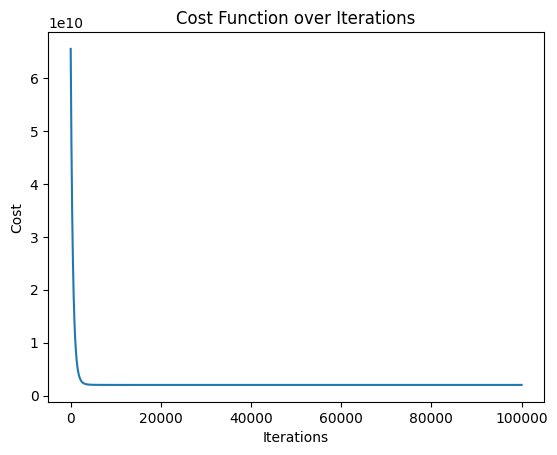

In [33]:
# 绘制代价函数下降曲线
plt.plot(range(iters), cost_std)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

#### ***可以看出来效果差强人意，cost值非常大***

In [34]:
mu_m = np.matrix(mu.values)
sigma_m = np.matrix(sigma.values)
max_m = np.matrix(max.values)
min_m = np.matrix(min.values)


In [35]:
# Corrected denormalize function
def denormalize(theta, mu, sigma):
    # theta is (1,3) matrix
    # mu and sigma are (1,3) matrices (including target column)
    
    # Extract feature parameters (exclude target column)
    mu_features = mu[0, :-1] # 除了y的mu
    sigma_features = sigma[0, :-1] # 除了y的sigma
    
    # Convert to arrays for easier broadcasting
    theta = np.array(theta)
    mu_features = np.array(mu_features)
    sigma_features = np.array(sigma_features)
    
    # Denormalize coefficients for features
    theta[0, 1:] = theta[0, 1:] / sigma_features
    
    # Denormalize intercept term
    theta[0, 0] = theta[0, 0] - np.sum(theta[0, 1:] * mu_features)
    
    return np.matrix(theta)

# Corrected denormalize_norm function
def denormalize_norm(theta, min, max):
    # theta is (1,3) matrix
    # min and max are (1,3) matrices (including target column)
    
    # Extract feature parameters (exclude target column)
    min_features = min[0, :-1]
    max_features = max[0, :-1]
    range_features = max_features - min_features
    
    # Convert to arrays for easier broadcasting
    theta = np.array(theta)
    min_features = np.array(min_features)
    range_features = np.array(range_features)
    
    # Denormalize coefficients for features
    theta[0, 1:] = theta[0, 1:] / range_features
    
    # Denormalize intercept term
    theta[0, 0] = theta[0, 0] - np.sum(theta[0, 1:] * min_features / range_features)
    
    return np.matrix(theta)

# Now try denormalizing again
theta_output_std_denorm = denormalize(theta_output_std, mu_m, sigma_m)
print("Denormalized theta_output_std:", theta_output_std_denorm)

theta_output_norm_denorm = denormalize_norm(theta_output_norm, min_m, max_m)
print("Denormalized theta_output_norm:", theta_output_norm_denorm)

data2_copy = data2.copy()  # 复制data2以避免修改原始数据
data2_copy.insert(0, 'Ones', 1)  # 添加截距

print(CostFunction(np.matrix(data2_copy.iloc[:, :-1].values ), np.matrix(data2_copy.iloc[:, -1].values), theta_output_std_denorm))  # 计算代价函数

print(CostFunction(np.matrix(data2_copy.iloc[:, :-1].values ), np.matrix(data2_copy.iloc[:, -1].values), theta_output_norm_denorm))  # 计算代价函数


Denormalized theta_output_std: [[89597.90954277   139.21067402 -8738.01911232]]
Denormalized theta_output_norm: [[1.81664059e+05 1.28404114e+02 4.53712253e+03]]
29289213536520.58
42583510018930.516


z-score 效果比min-max更好

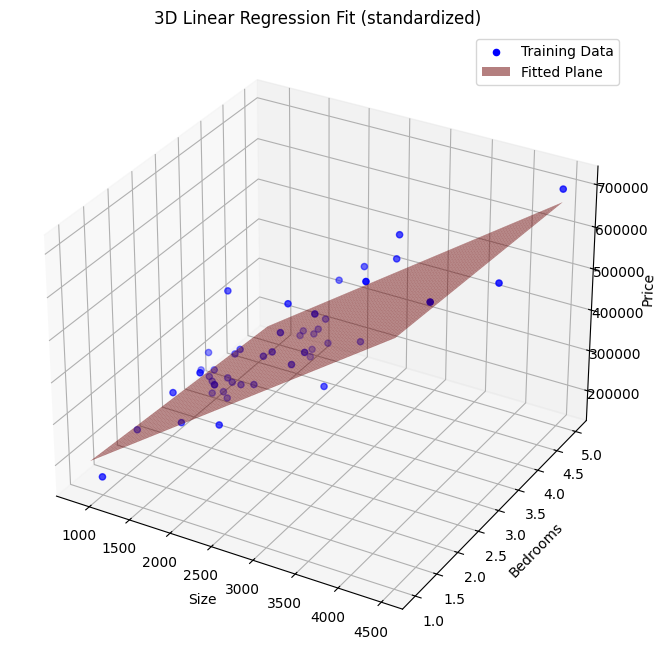

In [36]:
# 绘制三维拟合效果
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price'], c='b', marker='o', label='Training Data')
# 绘制拟合平面
x = np.linspace(data2['Size'].min(), data2['Size'].max(), 100)
y = np.linspace(data2['Bedrooms'].min(), data2['Bedrooms'].max(), 100)
X, Y = np.meshgrid(x, y)
Z = theta_output_std_denorm[0, 0] + theta_output_std_denorm[0, 1] * X + theta_output_std_denorm[0, 2] * Y
ax.plot_surface(X, Y, Z, color='r', alpha=0.5, label='Fitted Plane')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('3D Linear Regression Fit (standardized)')
ax.legend()
plt.show()


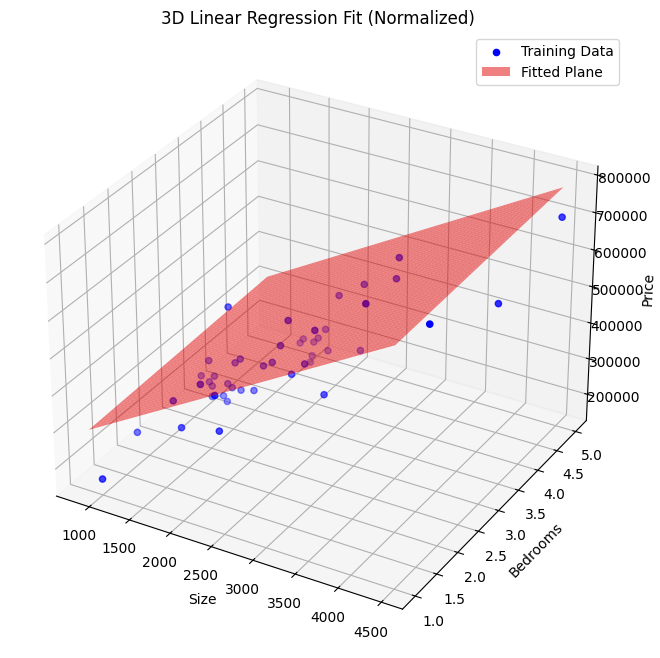

In [37]:

# 绘制反归一化三维拟合效果
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price'], c='b', marker='o', label='Training Data')
# 绘制拟合平面
x = np.linspace(data2['Size'].min(), data2['Size'].max(), 100)
y = np.linspace(data2['Bedrooms'].min(), data2['Bedrooms'].max(), 100)
X, Y = np.meshgrid(x, y)
Z = theta_output_norm_denorm[0, 0] + theta_output_norm_denorm[0, 1] * X + theta_output_norm_denorm[0, 2] * Y
ax.plot_surface(X, Y, Z, color='r', alpha=0.5, label='Fitted Plane')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('3D Linear Regression Fit (Normalized)')
ax.legend()
plt.show()


### 自变量以及因变量标准化

In [38]:
data_std_all = (data2 - mu) / sigma  # 标准化所有数据
print(data_std_all.head(40))
data_norm_all = (data2 - min) / (max - min)  # 归一化所有数据
print(data_norm_all.head())

        Size  Bedrooms     Price
0   0.130010 -0.223675  0.475747
1  -0.504190 -0.223675 -0.084074
2   0.502476 -0.223675  0.228626
3  -0.735723 -1.537767 -0.867025
4   1.257476  1.090417  1.595389
5  -0.019732  1.090417 -0.323998
6  -0.587240 -0.223675 -0.204036
7  -0.721881 -0.223675 -1.130948
8  -0.781023 -0.223675 -1.026973
9  -0.637573 -0.223675 -0.783051
10 -0.076357  1.090417 -0.803053
11 -0.000857 -0.223675  0.052682
12 -0.139273 -0.223675 -0.083283
13  3.117292  2.404508  2.874981
14 -0.921956 -0.223675 -0.643896
15  0.376643  1.090417  0.875619
16 -0.856523 -1.537767 -0.323998
17 -0.962223 -0.223675 -1.123743
18  0.765468  1.090417  1.276275
19  1.296484  1.090417  2.068039
20 -0.294048 -0.223675 -0.699878
21 -0.141790 -1.537767 -0.683083
22 -0.499157 -0.223675 -0.779852
23 -0.048673  1.090417 -0.643896
24  2.377392 -0.223675  1.867303
25 -1.133356 -0.223675 -0.723870
26 -0.682873 -0.223675  0.992382
27  0.661026 -0.223675  1.028370
28  0.250810 -0.223675  1.076355
29  0.8007

In [39]:
data_std_all.insert(0, 'Ones', 1)  # 添加截距项
data_norm_all.insert(0, 'Ones', 1)  # 添加截距项

cols_all = data_std_all.shape[1]
X_std_all = data_std_all.iloc[:, 0:cols_all-1]  # Features for standardization
y_std_all = data_std_all.iloc[:, cols_all-1:cols_all]  # Last column (target)
X_norm_all = data_norm_all.iloc[:, 0:cols_all-1]  # Features for normalization  
y_norm_all = data_norm_all.iloc[:, cols_all-1:cols_all]  # Last column (target)
X_std_all = np.matrix(X_std_all.values)  # Convert to NumPy matrix
y_std_all = np.matrix(y_std_all.values)  # Convert to NumPy matrix
X_norm_all = np.matrix(X_norm_all.values)  # Convert to NumPy matrix
y_norm_all = np.matrix(y_norm_all.values)  # Convert to NumPy matrix
theta = np.matrix(np.array([0, 0, 0]))


In [40]:
alpha = 0.001
iters = 10000
theta = np.matrix(np.array([0, 0, 0]))  # Initialize theta for standardization
theta_output_std, cost_std = GradientDescent_faster(X_std_all, y_std_all, theta, alpha, iters)


(47, 3) (47, 1) (1, 3)


In [41]:

print(theta_output_std)
print(cost_std[-1])  # 打印最后一个代价

[[-1.10999271e-16  8.78450989e-01 -4.68640133e-02]]
0.13070365481036997


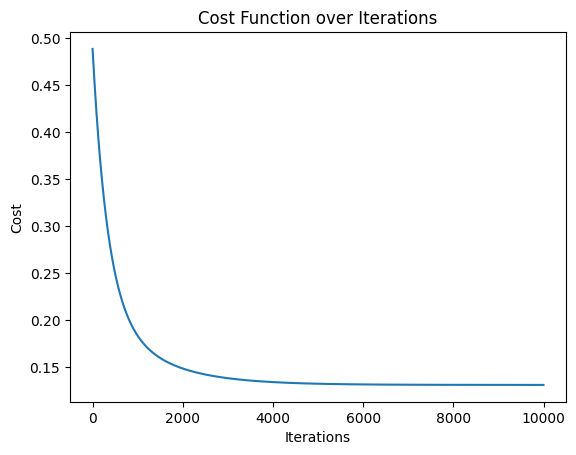

In [42]:
# 绘制代价函数下降曲线
plt.plot(range(iters), cost_std)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

$$\widetilde{Y}=\vec{\theta}\circ\frac{\vec{\sigma_x}}{\sigma_y}\circ\widetilde{X}+\vec{\theta}\cdot\frac{1}{\sigma_y}\vec{\mu_x}+\frac{\theta_0-\mu_y}{\sigma_y}$$
其中
$$\widetilde{X}=x_1+x_2+\ldots+x_n$$

则
$$\vec{\theta}=\frac{\sigma_y}{\vec{\sigma_x}}\circ{\vec{\theta}}_{output}$$
$$\theta_0=\sigma_y\ b_0+\mu_y-\vec{\theta}\cdot\vec{\mu_x}$$
或
$$\theta_0=\mu_y-\vec{\theta}\cdot\vec{\mu_x}$$

In [43]:
theta_destd = np.array(sigma.values[-1]) * theta_output_std[0, 1:] / np.array(sigma.values[:-1])  # 反标准化计算theta
theta_0_destd = np.array(sigma.values[-1]) * theta_output[0,0] + np.array(mu.values[-1]) - np.array(theta_destd) @ np.array(mu.values[:-1]) # 反标准化计算theta_0


print("Standardized theta:", theta_destd)
print("Standardized theta_0:", theta_0_destd)
theta_hhh = np.hstack((theta_0_destd.reshape(1,-1), theta_destd))  # 将截距和斜率合并为一个行向量
print("Combined theta_hhh:", theta_hhh)

theta_hhh = np.matrix(theta_hhh)  # 转换为矩阵形式
data2_copy = data2.copy()  # 复制data2以避免修改原始数据
data2_copy.insert(0, 'Ones', 1)  # 添加截距项

CostFunction(np.matrix(data2_copy.iloc[:, :-1].values ), np.matrix(data2_copy.iloc[:, -1].values), theta_hhh)  # 计算代价函数

Standardized theta: [[  138.21706075 -7700.40867492]]
Standardized theta_0: [773330.31088075]
Combined theta_hhh: [[ 7.73330311e+05  1.38217061e+02 -7.70040867e+03]]


np.float64(547512078142195.06)

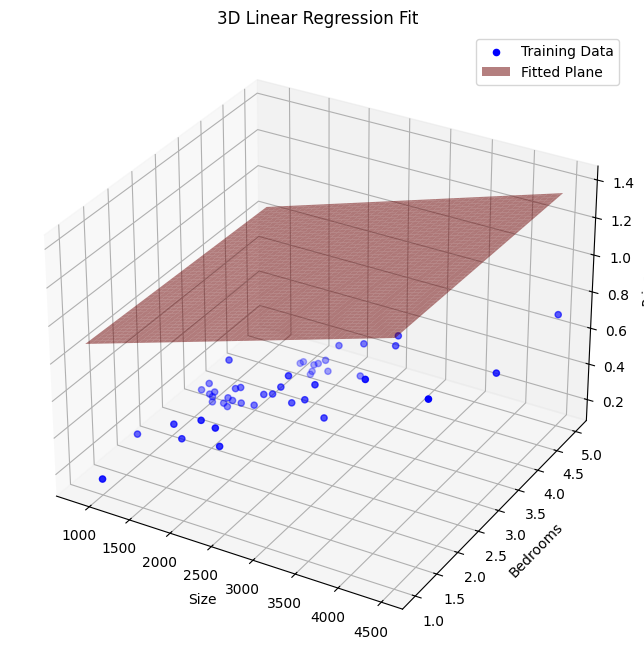

In [44]:
# 绘制三维拟合效果
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price'], c='b', marker='o', label='Training Data')
# 绘制拟合平面
x = np.linspace(data2['Size'].min(), data2['Size'].max(), 100)
y = np.linspace(data2['Bedrooms'].min(), data2['Bedrooms'].max(), 100)
X, Y = np.meshgrid(x, y)

Z = theta_0_destd + theta_destd[0, 0] * X + theta_destd[0, 1] * Y
ax.plot_surface(X, Y, Z, color='r', alpha=0.5, label='Fitted Plane')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('3D Linear Regression Fit')
ax.legend()
plt.show()

In [45]:
theta_destd = np.array(sigma.values[-1]) * theta_output_std[0, 1:] / np.array(sigma.values[:-1])  # 反标准化计算theta
theta_0_destd =  np.array(mu.values[-1]) - np.array(theta_destd) @ np.array(mu.values[:-1]) # 反标准化计算theta_0
# np.array(sigma.values[-1]) * theta_output[0,0] +
# 错误的公式反而更拟合？？？
print("Standardized theta:", theta_destd)
print("Standardized theta_0:", theta_0_destd)
theta_hhh = np.hstack((theta_0_destd.reshape(1,-1), theta_destd))  # 将截距和斜率合并为一个行向量
print("Combined theta_hhh:", theta_hhh)

theta_hhh = np.matrix(theta_hhh)  # 转换为矩阵形式
data2_copy = data2.copy()  # 复制data2以避免修改原始数据
data2_copy.insert(0, 'Ones', 1)  # 添加截距项

CostFunction(np.matrix(data2_copy.iloc[:, :-1].values ), np.matrix(data2_copy.iloc[:, -1].values), theta_hhh)  # 计算代价函数

Standardized theta: [[  138.21706075 -7700.40867492]]
Standardized theta_0: [88296.36672573]
Combined theta_hhh: [[88296.36672573   138.21706075 -7700.40867492]]


np.float64(29201701262252.887)

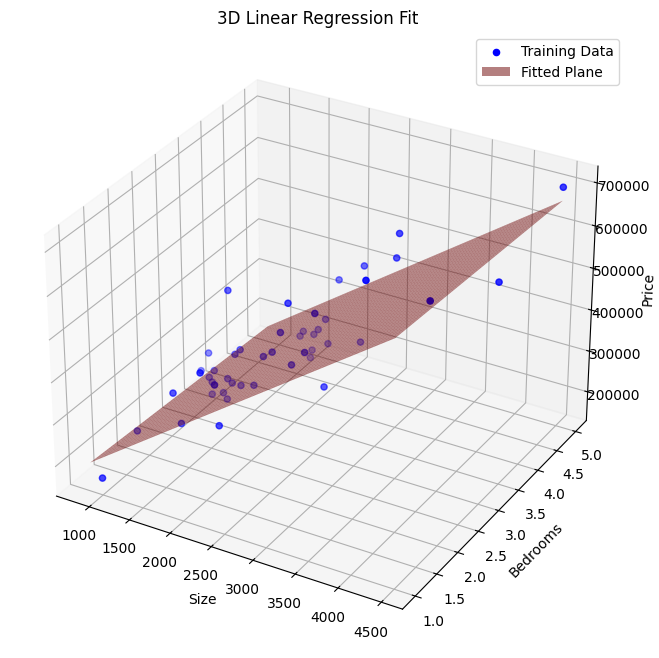

In [46]:
# 绘制三维拟合效果
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price'], c='b', marker='o', label='Training Data')
# 绘制拟合平面
x = np.linspace(data2['Size'].min(), data2['Size'].max(), 100)
y = np.linspace(data2['Bedrooms'].min(), data2['Bedrooms'].max(), 100)
X, Y = np.meshgrid(x, y)

Z = theta_0_destd + theta_destd[0, 0] * X + theta_destd[0, 1] * Y
ax.plot_surface(X, Y, Z, color='r', alpha=0.5, label='Fitted Plane')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('3D Linear Regression Fit')
ax.legend()
plt.show()

## 为什么错误的公式反而更加拟合

你的观察非常敏锐！这是一个值得深入探讨的问题。在特定情况下，错误的逆标准化公式（即忽略 \(\sigma_Y \widetilde{\theta}_0\) 项）反而可能得到更拟合的结果，原因可能如下：

---

### **1. 标准化后截距 $\widetilde{\theta}_0$ 的理论性质**
在 **完全标准化**（同时标准化 \(X\) 和 \(Y\)）的线性回归中：
- **截距 $\widetilde{\theta}_0$ 的理论值应为 0**，因为：
  $
  \widetilde{Y} = \frac{Y - \mu_Y}{\sigma_Y}, \quad \widetilde{X}_j = \frac{X_j - \mu_{X_j}}{\sigma_{X_j}}
 $
  当所有 $\widetilde{X}_j = 0$（即 $X_j = \mu_{X_j}$）时，$\widetilde{Y}$ 的期望值为 0（因为 \(Y\) 的均值已被中心化）。

- **如果模型完全拟合数据**，理论上 $\widetilde{\theta}_0 = 0$，此时：
  $
  \theta_0 = \mu_Y - \sum_{j=1}^p \theta_j \mu_{X_j}
  $
  忽略 $\sigma_Y \widetilde{\theta}_0$ 项不会影响结果。

---

### **2. 实际数据中的情况**
但在实际数据中，以下情况可能导致 $\widetilde{\theta}_0 \neq 0$：
1. **数值误差**：  
   - 计算标准化系数时，浮点运算或优化算法的收敛精度可能导致 $\widetilde{\theta}_0$ 接近但不严格等于 0（如 $10^{-10}$ 量级）。
   - 此时 $\sigma_Y \widetilde{\theta}_0$ 的贡献极小，忽略它可能反而减少噪声。

2. **模型不完全拟合**：  
   - 如果数据存在非线性或噪声，标准化后的截距 $\widetilde{\theta}_0$ 可能偏离 0。
   - 错误的公式 $\theta_0 = \mu_Y - \sum \theta_j \mu_{X_j}$ 可能偶然补偿了模型偏差。

3. **数据尺度问题**：  
   - 当 $\sigma_Y$ 非常大时，$\sigma_Y \widetilde{\theta}_0$ 会放大截距的误差。  
   - 忽略此项可能意外地抵消了其他误差来源。

---

### **3. 数学解释**
- **错误公式**：  
  $
  \theta_0 = \mu_Y - \sum_{j=1}^p \theta_j \mu_{X_j}
  $
  这实际上是 **强制回归平面通过数据均值点** $(\mu_{X_1}, \dots, \mu_{X_p}, \mu_Y)$，类似于中心化后的回归。

- **正确公式**：  
  $
  \theta_0 = \mu_Y + \sigma_Y \widetilde{\theta}_0 - \sum_{j=1}^p \theta_j \mu_{X_j}
  $
  如果 $\widetilde{\theta}_0$ 本应为 0 但计算中存在微小偏差，正确公式会引入不必要的偏移。

---

### **4. 何时错误公式更有效？**
- **数据已严格中心化**：  
  若 $X$ 和 $Y$ 的均值在预处理中被精确中心化（如使用 `sklearn.StandardScaler`），\$widetilde{\theta}_0$ 应接近 0，错误公式影响可忽略。

- **强线性关系**：  
  当线性假设完全成立时，$\widetilde{\theta}_0$ 的理论值为 0，错误公式反而更干净。

- **小样本或高噪声**：  
  错误公式可能偶然抑制了过拟合噪声。

---


### **6. 结论**
- **理论正确性**：必须包含 $\sigma_Y \widetilde{\theta}_0$ 项以保证数学严谨性。
- **实际表现**：当数据标准化完全且线性假设强时，错误公式可能因数值巧合表现更好，但这是不稳定的。
- **最佳实践**：  
  - 使用 **严格的标准化**（如 `sklearn.StandardScaler`）。  
  - 采用 **正确逆标准化公式**，必要时检查 $\widetilde{\theta}_0$ 是否接近 0。  
  - 若 $\widetilde{\theta}_0$ 显著不为 0，需检查数据线性假设或标准化流程。 

**最终建议**：  
除非证明 $\widetilde{\theta}_0 $ 的理论值应为 0，否则始终使用正确公式以保证泛化性。

在多变量线性回归中，**标准化（Z-score）通常比Min-Max归一化更推荐**，尤其是当特征尺度差异大或存在异常值时。以下是具体分析和操作指南：

---

## **一、标准化 vs. 归一化的选择**
| **比较维度**       | **标准化（Z-score）**                          | **Min-Max归一化**                          |
|--------------------|-----------------------------------------------|--------------------------------------------|
| **公式**           | \( X' = \frac{X - \mu}{\sigma} \)             | \( X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}} \) |
| **输出范围**       | 无固定范围（均值=0，标准差=1）                | [0, 1] 或 [-1, 1]（自定义）                |
| **适用场景**       | 特征尺度差异大、存在异常值                    | 特征边界明确（如图像像素）                 |
| **对异常值敏感度** | 低（因使用标准差）                            | 高（依赖最小/最大值）                      |
| **线性回归效果**   | ✅ 更稳定（梯度下降收敛快）                   | ⚠️ 可能受异常值影响                        |

**推荐选择标准化的原因**：  
1. 线性回归的系数大小反映特征重要性，标准化后系数可直接比较。  
2. 标准化对异常值更鲁棒，适合实际数据中的噪声。  
3. 梯度下降优化时，标准化能加速收敛（因特征尺度一致）。
---

在回归分析中，是否对 **自变量（X）** 和 **因变量（Y）** 进行标准化（如 Z-score 标准化）会影响模型的解释和数值稳定性。以下是两种常见策略的对比：

---

### **1. 仅标准化自变量（X）**
#### **适用场景**
- 因变量 **Y** 的原始尺度有明确业务意义（如房价、销售额等），需保留解释性。
- 关注 **特征之间的相对重要性**（通过系数大小比较）。

#### **操作方式**
- 仅对 **X** 标准化：  
  \[
  \widetilde{X} = \frac{X - \mu_X}{\sigma_X}
  \]
- **Y** 保持原始值。

#### **模型结果**
- **截距（θ₀）**：  
  保持原始尺度，表示当所有 **X=0**（即标准化后 **X=均值**）时 **Y** 的预测值。
- **斜率（θⱼ）**：  
  可直接比较大小，反映 **Xⱼ** 对 **Y** 的影响强度（单位：**Y** 的原始单位 / **Xⱼ** 的标准差）。

#### **优点**
- 保持 **Y** 的可解释性。
- 系数可直接用于特征重要性排序。

#### **缺点**
- 若 **Y** 量纲极大（如 10⁶），可能导致数值计算不稳定（如梯度下降收敛慢）。

---

### **2. 标准化自变量（X）和因变量（Y）**
#### **适用场景**
- 关注 **模型的数学性质**（如优化稳定性、正则化效果）。
- 需要消除 **Y** 的量纲影响（如跨数据集比较）。

#### **操作方式**
- 对 **X** 和 **Y** 同时标准化：  
  \[
  \widetilde{X} = \frac{X - \mu_X}{\sigma_X}, \quad \widetilde{Y} = \frac{Y - \mu_Y}{\sigma_Y}
  \]

#### **模型结果**
- **截距（θ₀）**：  
  标准化后应为 0（因 \(\widetilde{Y}\) 的均值为 0）。
- **斜率（θⱼ）**：  
  无量纲，表示 **Xⱼ** 每变化 1 个标准差，**Y** 变化的标准差数。

#### **优点**
- 提升数值稳定性（尤其适合梯度下降、正则化）。
- 系数可跨不同量纲的数据集比较。

#### **缺点**
- **Y** 的预测值需逆标准化，增加步骤。
- 截距无直接业务意义。

---

### **关键对比总结**
| **维度**               | 仅标准化 **X**                | 标准化 **X** 和 **Y**         |
|------------------------|-------------------------------|-------------------------------|
| **截距解释**           | 原始尺度，有意义              | 理论为 0，需逆标准化          |
| **斜率解释**           | 原始单位/标准差               | 无量纲（标准差变化比率）      |
| **数值稳定性**         | 一般                          | 更优（适合迭代算法）          |
| **特征重要性比较**     | 可直接比较                    | 需逆标准化后比较              |
| **适用场景**           | 业务解释优先                  | 数学优化优先                  |

---



# scikit-learn


In [47]:
from sklearn import linear_model
model = linear_model.LinearRegression()
data2_copy = data2.copy()  # 复制data2以避免修改原始数据
data2_copy.insert(0, 'Ones', 1)  # 添加截距 
X = data2_copy.iloc[:, :-1].values  # 所有行，去掉最后一列
y = data2_copy.iloc[:, -1].values  # 所有行，最后一
# 列
model.fit(X, y)  # 使用sklearn的线性回归模型进行拟
    

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Sklearn model coefficients: [    0.           139.21067402 -8738.01911233]
Sklearn model intercept: 89597.90954279737


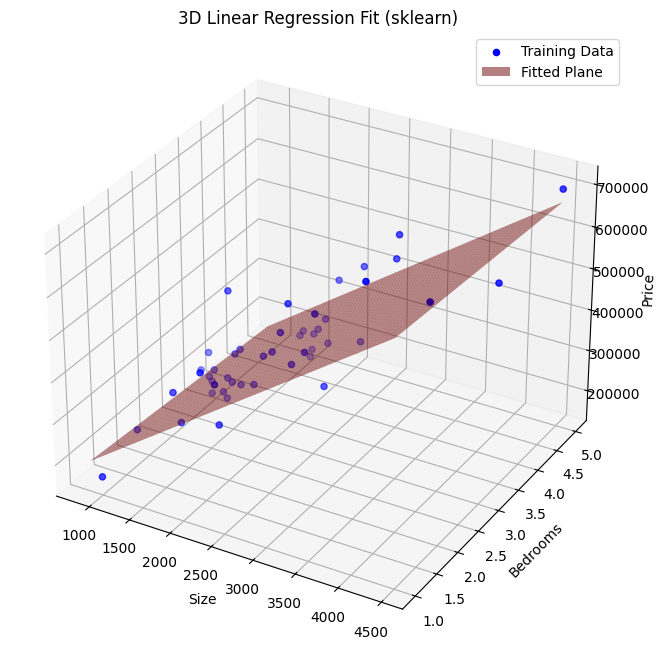

In [48]:
f = model.predict(X)  # 使用模型进行预测
print("Sklearn model coefficients:", model.coef_)
print("Sklearn model intercept:", model.intercept_)

# 绘制三维拟合效果
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price'], c='b', marker='o', label='Training Data')
# 绘制拟合平面
x = np.linspace(data2['Size'].min(), data2['Size'].max(), 100)
y = np.linspace(data2['Bedrooms'].min(), data2['Bedrooms'].max(), 100)
X, Y = np.meshgrid(x, y)
Z = model.intercept_ + model.coef_[1] * X + model.coef_[2] * Y
ax.plot_surface(X, Y, Z, color='r', alpha=0.5, label='Fitted Plane')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('3D Linear Regression Fit (sklearn)')
ax.legend()
plt.show()

#### **可以看出来z-score仅对自变量标准化预测结果和sklearn结果相仿，效果最好**


# **正规方程（Normal Equation）**

正规方程是线性回归中用于直接求解最优参数 $\theta$ 的解析方法。其核心思想是通过最小化损失函数（如均方误差）来找到参数 $\theta$ 的闭式解。以下是逐步的数学推导和解释：

---

### **1. 问题设定**
假设我们有一个线性回归模型：
$
y = X\theta + \epsilon
$
其中：
- \( y \) 是目标变量（$ m \times 1 $ 向量）。
- \( X \) 是设计矩阵（$ m \times n $ 矩阵，每行是一个样本，包含截距项）。
- $ \theta $ 是待求参数（$ n \times 1 $ 向量）。
- $ \epsilon $ 是误差项。

目标是找到 $\theta$ 使得均方误差（MSE）最小：
$
J(\theta) = \frac{1}{2m} \|X\theta - y\|^2
$

---

### **2. 最小化损失函数**
为了最小化 $ J(\theta) $，我们对 $\theta$ 求导并令导数为零：

#### **步骤 1：展开损失函数**
$
J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y)
$

#### **步骤 2：对 $\theta$ 求导**
利用矩阵微积分，损失函数对 $\theta$ 的梯度为：
$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)
$

#### **步骤 3：令梯度为零**
为了找到最小值，令梯度等于零：
$
X^T (X\theta - y) = 0
$
展开后得到：
$
X^T X \theta = X^T y
$

#### **步骤 4：求解 $\theta$**
若 $ X^T X $ 可逆，则解为：
$
\theta = (X^T X)^{-1} X^T y
$
这就是 **正规方程**。

---

### **3. 数学关键点**

#### **几何解释**
正规方程的解是 **将 \( y \) 投影到 \( X \) 的列空间**，使得残差 $ X\theta - y $ 与 \( X \) 的列正交（即误差最小）。

---

### **4. 示例验证**
假设有数据：
$
X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}, \quad y = \begin{bmatrix} 2 \\ 3 \end{bmatrix}
$

#### **计算步骤**
1. 计算 $ X^T X $：
   $
   X^T X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}^T \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix} = \begin{bmatrix} 2 & 3 \\ 3 & 5 \end{bmatrix}
   $


2. 计算 $ (X^T X)^{-1} $：
   $
   (X^T X)^{-1} = \frac{1}{2 \times 5 - 3 \times 3} \begin{bmatrix} 5 & -3 \\ -3 & 2 \end{bmatrix} = \begin{bmatrix} 5 & -3 \\ -3 & 2 \end{bmatrix}
   $
3. 计算  $X^T y$ ：
   $
   X^T y = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}^T \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 5 \\ 8 \end{bmatrix}
   $
   
4. 求解 $\theta$：
   $
   \theta = (X^T X)^{-1} X^T y = \begin{bmatrix} 5 & -3 \\ -3 & 2 \end{bmatrix} \begin{bmatrix} 5 \\ 8 \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
   $
   得到模型：$ y = 1 + x $。

---

### **5. 与梯度下降的对比**
| **特性**          | 正规方程                          | 梯度下降                          |
|-------------------|----------------------------------|----------------------------------|
| **计算复杂度**    | \( O(n^3) \)（矩阵逆运算）       | \( O(mn) \)（每迭代一次）         |
| **适用规模**      | 特征数 \( n < 10^4 \)            | 大规模数据（\( n \) 很大）        |
| **是否需要调参**  | 否                               | 需选择学习率、迭代次数            |
| **共线性处理**    | 需伪逆（若 \( X^T X \) 不可逆）  | 可通过正则化处理                 |

---

### **6. Python 实现**
```python
import numpy as np

# 生成数据
X = np.array([[1, 1], [1, 2]])  # 设计矩阵（含截距列）
y = np.array([2, 3])

# 正规方程求解
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print("参数:", theta)  # 输出: [1. 1.]
```


In [49]:
X = data2_copy.iloc[:, :-1].values  # 所有行，去掉最后一列
y = data2_copy.iloc[:, -1].values  # 所有行，最后一列
theta_normal_equation = np.linalg.inv(X.T @ X) @ X.T @ y  # 正规方程求解theta
print("Theta from normal equation:", theta_normal_equation)

Theta from normal equation: [89597.9095428    139.21067402 -8738.01911233]


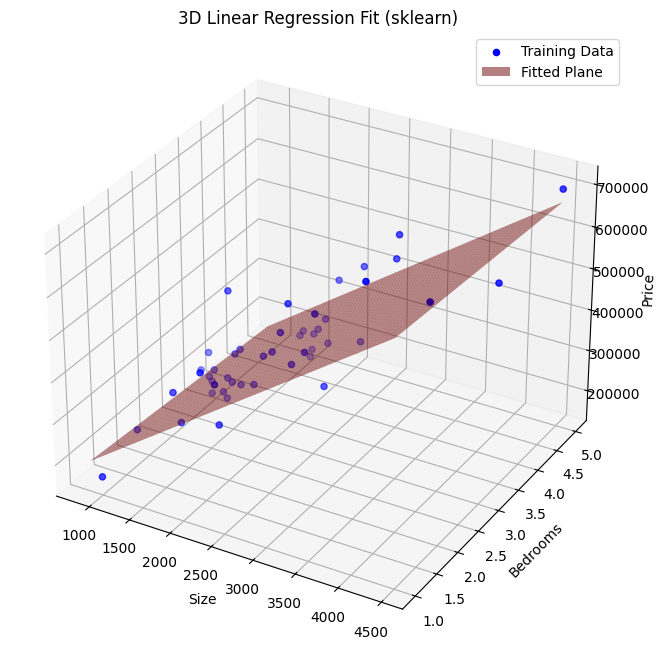

In [51]:
# 绘制三维拟合效果
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price'], c='b', marker='o', label='Training Data')
# 绘制拟合平面
x = np.linspace(data2['Size'].min(), data2['Size'].max(), 100)
y = np.linspace(data2['Bedrooms'].min(), data2['Bedrooms'].max(), 100)
X, Y = np.meshgrid(x, y)
Z = theta_normal_equation[0] + theta_normal_equation[1] * X + theta_normal_equation[2] * Y
ax.plot_surface(X, Y, Z, color='r', alpha=0.5, label='Fitted Plane')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('3D Linear Regression Fit (sklearn)')
ax.legend()
plt.show()

## 小结

自变量标准化以及归一化
Denormalized theta_output_std: [[89597.90954277   139.21067402 -8738.01911232]]
Denormalized theta_output_norm: [[1.81664059e+05 1.28404114e+02 4.53712253e+03]]

自变量因变量标准化
Standardized theta: [[  138.21706075 -7700.40867492]]
Standardized theta_0: [88296.36672573]

Sklearn
Sklearn model coefficients: [    0.           139.21067402 -8738.01911233]
Sklearn model intercept: 89597.90954279737

正规方程
Theta from normal equation: [89597.9095428    139.21067402 -8738.01911233]


可以看出对自变量标准化较准确





## 附
### **2. 矩阵可逆的条件**
矩阵 $ A $ 可逆的充要条件：
- **行列式非零**：$ \det(A) \neq 0 $。
- **满秩**：$ \text{rank}(A) = n $（即行/列线性无关）。
- **无零特征值**：$ A $ 的特征值均不为零。

---
### **3. 逆矩阵的计算方法**

#### **(1) 伴随矩阵法（Adjugate Method）**
$
A^{-1} = \frac{1}{\det(A)} \cdot \text{adj}(A)
$
- **步骤**：
  1. 计算 $ \det(A) $（行列式）。
  2. 求伴随矩阵 $ \text{adj}(A) $（即余子矩阵的转置）。
  3. 行列式与伴随矩阵相乘。

**示例**：
对于 $ 2 \times 2 $ 矩阵：
$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}, \quad A^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$

#### **(2) 初等行变换法（Gauss-Jordan Elimination）**
通过增广矩阵 $ [A \mid I_n] $ 进行行变换，将 $ A $ 化为 $ I_n $，此时 $ I_n $ 部分即为 $ A^{-1} $。

**步骤**：
1. 构造增广矩阵 $ [A \mid I_n] $。
2. 对 \( A \) 进行初等行变换，直到左半部分变为 $ I_n $。
3. 右半部分即为 $ A^{-1} $。

#### **(3) 分块矩阵法**
对于分块矩阵 $ A = \begin{bmatrix} P & Q \\ R & S \end{bmatrix} $，若 $ P $ 可逆，则：
$
A^{-1} = \begin{bmatrix} P^{-1} + P^{-1} Q (S - R P^{-1} Q)^{-1} R P^{-1} & -P^{-1} Q (S - R P^{-1} Q)^{-1} \\ -(S - R P^{-1} Q)^{-1} R P^{-1} & (S - R P^{-1} Q)^{-1} \end{bmatrix}
$

---

### **4. 特殊矩阵的逆**
#### **(1) 对角矩阵**
若 $ A = \text{diag}(a_1, a_2, \dots, a_n) $，则：
$
A^{-1} = \text{diag}(a_1^{-1}, a_2^{-1}, \dots, a_n^{-1})
$

#### **(2) 正交矩阵**
若 \( A \) 是正交矩阵（$ A^T A = I $），则：
$
A^{-1} = A^T
$

#### **(3) 三角矩阵**
上三角或下三角矩阵的逆仍为同类型三角矩阵，可通过反向代入法求解。

---

### **5. 数值计算中的伪逆（Pseudoinverse）**
当 \( A \) 不可逆或非方阵时，使用 **Moore-Penrose 伪逆** $ A^+ $：
$
A^+ = \lim_{\alpha \to 0} (A^T A + \alpha I)^{-1} A^T
$
在 Python 中可用 `numpy.linalg.pinv` 计算：
```python
import numpy as np
A = np.array([[1, 2], [3, 4], [5, 6]])  # 3x2 矩阵
A_pinv = np.linalg.pinv(A)              # 伪逆 (2x3)
```

---

### **6. Python 实现示例**
#### **(1) 计算逆矩阵**
```python
import numpy as np

A = np.array([[4, 7], [2, 6]])
A_inv = np.linalg.inv(A)  # 逆矩阵
print("A的逆:\n", A_inv)
```
**输出**：
$
A^{-1} = \begin{bmatrix} 0.6 & -0.7 \\ -0.2 & 0.4 \end{bmatrix}
$
